In [26]:
# import sklearn as skl
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, roc_auc_score

df_pats_train = pd.read_csv('data/Melbourne/df_pats_train.csv')

#df.drop(columns=['Index', 'File', 'Patient', 'Epoch'], inplace=True)
df_pats_train.head()
#print(df)

,Unnamed: 0,Unnamed: 0.1,File,pat,BandEnergy_0_0_1,BandEnergy_0_0_2,BandEnergy_0_0_3,BandEnergy_0_0_4,BandEnergy_0_0_5,BandEnergy_0_0_6,...,MaxF15,SumEnergy15,BandEnergy151,BandEnergy152,BandEnergy153,BandEnergy154,BandEnergy155,entropy15,Mobility15,Complexity15
0,0,0,0,1,0.676710,0.177007,0.052561,0.052568,0.011559,0.004830,...,3,3.044084,0.766673,0.178871,0.035266,0.018159,0.000942,1.351005,0.312385,2.972663
1,1,1,0,1,0.196901,0.199529,0.115402,0.401242,0.055597,0.005788,...,6,3.016065,0.789826,0.160548,0.028113,0.020161,0.001228,1.349275,0.318690,3.100898
2,2,2,1,1,0.123216,0.154504,0.061770,0.254755,0.033287,0.006533,...,9,0.624092,0.529222,0.359786,0.051831,0.056016,0.002838,1.557037,0.468101,2.316029
3,3,3,0,1,0.627558,0.201005,0.044870,0.078152,0.013683,0.005542,...,4,3.092114,0.808760,0.145204,0.028354,0.016945,0.000670,1.306482,0.296413,3.055724
4,4,4,0,1,0.553635,0.226609,0.059016,0.102854,0.022594,0.006208,...,4,3.089903,0.821560,0.134603,0.027561,0.015505,0.000699,1.283819,0.289507,3.189365


In [28]:
df_pats_train.tail()

,Unnamed: 0,Unnamed: 0.1,File,pat,BandEnergy_0_0_1,BandEnergy_0_0_2,BandEnergy_0_0_3,BandEnergy_0_0_4,BandEnergy_0_0_5,BandEnergy_0_0_6,...,MaxF15,SumEnergy15,BandEnergy151,BandEnergy152,BandEnergy153,BandEnergy154,BandEnergy155,entropy15,Mobility15,Complexity15
4961,2158,2158,1,3,0.309841,0.178604,0.155431,0.299908,0.021361,0.005442,...,4,2.982949,0.366485,0.319786,0.179810,0.131279,0.002360,1.720709,0.603727,1.760334
4962,2159,2159,0,3,0.216807,0.231579,0.199363,0.289669,0.023133,0.005434,...,24,3.122247,0.284216,0.357657,0.169327,0.185523,0.002954,1.756107,0.684487,1.605461
4963,2160,2160,1,3,0.278227,0.212808,0.146414,0.303518,0.019172,0.003832,...,6,2.978802,0.404116,0.304037,0.164207,0.124938,0.002439,1.710312,0.591421,1.822992
4964,2161,2161,0,3,0.708853,0.156325,0.062460,0.040211,0.005855,0.002138,...,4,3.100700,0.628974,0.253300,0.069472,0.046927,0.001197,1.518090,0.424715,2.338243
4965,2162,2162,1,3,0.189543,0.181631,0.148374,0.422974,0.030277,0.005227,...,5,3.098448,0.299218,0.278986,0.211582,0.205716,0.004065,1.797264,0.724567,1.598530


In [29]:
df = df_pats_train

Verificando valores nulos

In [30]:
df.isnull().sum().sum()

317232

In [31]:
df.replace('', np.nan, inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [34]:
df.dropna(inplace=True)

In [35]:
df.replace('Inf', np.nan, inplace=True)

Retirando linhas que são constituídas por zero

In [36]:
#Adaptado

#maskZ=(df == 0).astype(int).sum(axis=1)<382*1
#dfZ=df[maskZ]

X = df.iloc[:,4:]
#print(X)
X = np.array(X)
#print(X)
y = df.loc[:,'File']
y.reset_index(drop=True)
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train)

[[0.40361905 0.16268209 0.05323477 ... 1.38122559 0.3234431  2.8960116 ]
 [0.27505872 0.44181424 0.11305197 ... 1.70987558 0.5972338  1.7479879 ]
 [0.48373407 0.27609238 0.09386573 ... 1.96417582 1.0304435  1.36687526]
 ...
 [0.41550177 0.26279765 0.13697246 ... 1.95450997 1.0534797  1.32039032]
 [0.6458117  0.17439595 0.05852944 ... 1.30605698 0.29541785 3.25420275]
 [0.51484627 0.2782937  0.10493664 ... 1.70204377 0.6201639  1.94120339]]


In [37]:
np.any(np.isnan(df))

False

In [38]:
np.all(np.isfinite(df))

True

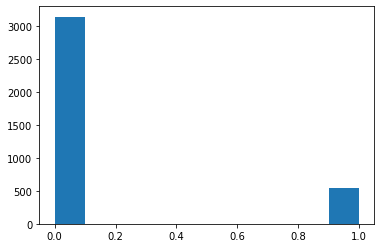

In [39]:
h = plt.hist(y_train)

## Trabalhando com pipelines de vários modelos

Montando um pipeline (z-score + modelo):
    - Naive Bayes
    - Support Vector Machine
    - Knn
    - Regressão logística
    - Classificador Ridge
    - Árvore de decisão
    - Random Forest
    - Random Forest balanceada
    - Percepron
    - Multi Layer Perceptron

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

pipe_nb = Pipeline(steps=[('scaler', StandardScaler()), ('gNB', GaussianNB())])
pipe_svm = Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(class_weight='balanced'))])
pipe_knn = Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
pipe_lr = Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression(max_iter=10000, class_weight='balanced'))])
pipe_ridge = Pipeline(steps=[('scaler', StandardScaler()), ('ridge', RidgeClassifier(class_weight='balanced'))])
pipe_dt = Pipeline(steps=[('scaler', StandardScaler()), ('dt', DecisionTreeClassifier(class_weight='balanced'))])
pipe_rf = Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier(class_weight='balanced'))])
pipe_brf = Pipeline(steps=[('scaler', StandardScaler()), ('brf', BalancedRandomForestClassifier(class_weight='balanced'))])
pipe_perc = Pipeline(steps=[('scaler', StandardScaler()), ('perc', Perceptron(max_iter=10000,class_weight='balanced'))])
pipe_mlp = Pipeline(steps=[('scaler', StandardScaler()), ('mlp', MLPClassifier(max_iter=10000))])
pipe_ada = Pipeline(steps=[('scaler', StandardScaler()), ('ada', AdaBoostClassifier())])




In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

cv = StratifiedKFold(n_splits=5)
pipelines = [pipe_nb, pipe_svm, pipe_knn, pipe_lr, pipe_ridge, pipe_dt, pipe_rf, pipe_perc, pipe_mlp, pipe_brf, pipe_ada]
#pipelines = [pipe_nb, pipe_knn]

prec=[]
acc=[]
bacc=[]
fone=[]
revoc=[]
roc=[]
count=0

metrics = ['precision', 'accuracy', 'balanced_accuracy', 'f1', 'recall', 'roc_auc']

for pipe in pipelines:
    
    count+=1
    print('Metrics for model', count)
    score = cross_validate(pipe, X_train, y_train, cv = cv, scoring=metrics)
    acc.append(score['test_accuracy'])
    bacc.append(score['test_balanced_accuracy'])
    prec.append(score['test_precision'])
    fone.append(score['test_f1'])
    revoc.append(score['test_recall'])
    roc.append(score['test_roc_auc'])

Metrics for model 1
Metrics for model 2
Metrics for model 3
Metrics for model 4
Metrics for model 5
Metrics for model 6
Metrics for model 7
Metrics for model 8
Metrics for model 9
Metrics for model 10
Metrics for model 11


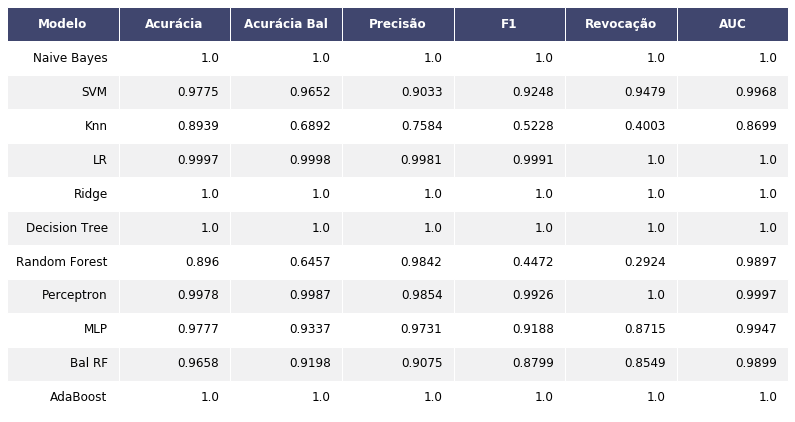

In [42]:
import six

prec=np.array(prec)
acc=np.array(acc)
bacc=np.array(bacc)
fone=np.array(fone)
revoc=np.array(revoc)
roc=np.array(roc)

sc_dic = {'Modelo': ['Naive Bayes', 'SVM', 'Knn', 'LR', 'Ridge','Decision Tree', 'Random Forest', 'Perceptron', 'MLP','Bal RF', 'AdaBoost'],
          'Acurácia': [np.mean(acc[0,:]), np.mean(acc[1,:]), np.mean(acc[2,:]), np.mean(acc[3,:]),
                      np.mean(acc[4,:]), np.mean(acc[5,:]), np.mean(acc[6,:]), np.mean(acc[7,:]), 
                      np.mean(acc[8,:]), np.mean(acc[9,:]), np.mean(acc[10,:])], 
         'Acurácia Bal': [np.mean(bacc[0,:]), np.mean(bacc[1,:]), np.mean(bacc[2,:]), np.mean(bacc[3,:]),
                      np.mean(bacc[4,:]), np.mean(bacc[5,:]), np.mean(bacc[6,:]), np.mean(bacc[7,:]), 
                      np.mean(bacc[8,:]), np.mean(bacc[9,:]),np.mean(bacc[10,:])],
         'Precisão': [np.mean(prec[0,:]), np.mean(prec[1,:]), np.mean(prec[2,:]), np.mean(prec[3,:]),
                      np.mean(prec[4,:]), np.mean(prec[5,:]), np.mean(prec[6,:]), np.mean(prec[7,:]), 
                      np.mean(prec[8,:]), np.mean(prec[9,:]), np.mean(prec[10,:])],
         'F1': [np.mean(fone[0,:]), np.mean(fone[1,:]), np.mean(fone[2,:]), np.mean(fone[3,:]),
                      np.mean(fone[4,:]), np.mean(fone[5,:]), np.mean(fone[6,:]), np.mean(fone[7,:]), 
                      np.mean(fone[8,:]), np.mean(fone[9,:]), np.mean(fone[10,:])],
         'Revocação': [np.mean(revoc[0,:]), np.mean(revoc[1,:]), np.mean(revoc[2,:]), np.mean(revoc[3,:]),
                      np.mean(revoc[4,:]), np.mean(revoc[5,:]), np.mean(revoc[6,:]), np.mean(revoc[7,:]), 
                      np.mean(revoc[8,:]), np.mean(revoc[9,:]), np.mean(revoc[10,:])],
         'AUC': [np.mean(roc[0,:]), np.mean(roc[1,:]), np.mean(roc[2,:]), np.mean(roc[3,:]),
                      np.mean(roc[4,:]), np.mean(roc[5,:]), np.mean(roc[6,:]), np.mean(roc[7,:]), 
                      np.mean(roc[8,:]), np.mean(roc[9,:]), np.mean(roc[10,:])],}


dfd = pd.DataFrame.from_dict(sc_dic)
dfd


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(dfd.round(4), header_columns=0, col_width=2.0)
plt.savefig('Tab1.pdf')

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Testando oversampling (SMOTE)

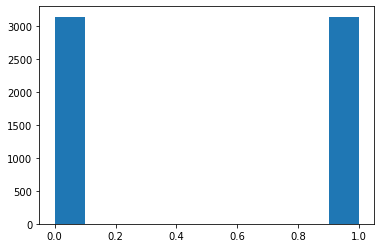

In [44]:
from imblearn import over_sampling
from imblearn import under_sampling
from imblearn import combine

oversamp = over_sampling.SMOTE() # sampling_strategy pode ser usado para casos binários
Xo, Yo = oversamp.fit_resample(X_train, y_train)
h = plt.hist(Yo)

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

cv = StratifiedKFold(n_splits=5)
pipelines = [pipe_nb, pipe_svm, pipe_knn, pipe_lr, pipe_ridge, pipe_dt, pipe_rf, pipe_perc, pipe_mlp, pipe_brf, pipe_ada]
#pipelines = [pipe_nb, pipe_knn]

prec=[]
acc=[]
bacc=[]
fone=[]
revoc=[]
roc=[]
count=0

metrics = ['precision', 'accuracy', 'balanced_accuracy', 'f1', 'recall', 'roc_auc']
for pipe in pipelines:
    
    count+=1
    print('Metrics for model', count)
    score = cross_validate(pipe, Xo, Yo, cv = cv, scoring=metrics, n_jobs=-1)
    acc.append(score['test_accuracy'])
    bacc.append(score['test_balanced_accuracy'])
    prec.append(score['test_precision'])
    fone.append(score['test_f1'])
    revoc.append(score['test_recall'])
    roc.append(score['test_roc_auc'])

Metrics for model 1
Metrics for model 2
Metrics for model 3
Metrics for model 4
Metrics for model 5
Metrics for model 6
Metrics for model 7
Metrics for model 8
Metrics for model 9
Metrics for model 10
Metrics for model 11


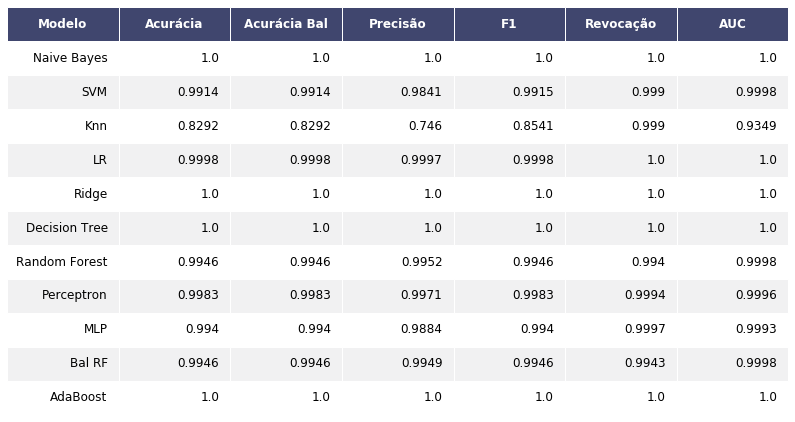

In [46]:
prec=np.array(prec)
acc=np.array(acc)
bacc=np.array(bacc)
fone=np.array(fone)
revoc=np.array(revoc)
roc=np.array(roc)

sc_dic = {'Modelo': ['Naive Bayes', 'SVM', 'Knn', 'LR', 'Ridge','Decision Tree', 'Random Forest', 'Perceptron', 'MLP','Bal RF', 'AdaBoost'],
          'Acurácia': [np.mean(acc[0,:]), np.mean(acc[1,:]), np.mean(acc[2,:]), np.mean(acc[3,:]),
                      np.mean(acc[4,:]), np.mean(acc[5,:]), np.mean(acc[6,:]), np.mean(acc[7,:]), 
                      np.mean(acc[8,:]), np.mean(acc[9,:]), np.mean(acc[10,:])], 
         'Acurácia Bal': [np.mean(bacc[0,:]), np.mean(bacc[1,:]), np.mean(bacc[2,:]), np.mean(bacc[3,:]),
                      np.mean(bacc[4,:]), np.mean(bacc[5,:]), np.mean(bacc[6,:]), np.mean(bacc[7,:]), 
                      np.mean(bacc[8,:]), np.mean(bacc[9,:]),np.mean(bacc[10,:])],
         'Precisão': [np.mean(prec[0,:]), np.mean(prec[1,:]), np.mean(prec[2,:]), np.mean(prec[3,:]),
                      np.mean(prec[4,:]), np.mean(prec[5,:]), np.mean(prec[6,:]), np.mean(prec[7,:]), 
                      np.mean(prec[8,:]), np.mean(prec[9,:]), np.mean(prec[10,:])],
         'F1': [np.mean(fone[0,:]), np.mean(fone[1,:]), np.mean(fone[2,:]), np.mean(fone[3,:]),
                      np.mean(fone[4,:]), np.mean(fone[5,:]), np.mean(fone[6,:]), np.mean(fone[7,:]), 
                      np.mean(fone[8,:]), np.mean(fone[9,:]), np.mean(fone[10,:])],
         'Revocação': [np.mean(revoc[0,:]), np.mean(revoc[1,:]), np.mean(revoc[2,:]), np.mean(revoc[3,:]),
                      np.mean(revoc[4,:]), np.mean(revoc[5,:]), np.mean(revoc[6,:]), np.mean(revoc[7,:]), 
                      np.mean(revoc[8,:]), np.mean(revoc[9,:]), np.mean(revoc[10,:])],
         'AUC': [np.mean(roc[0,:]), np.mean(roc[1,:]), np.mean(roc[2,:]), np.mean(roc[3,:]),
                      np.mean(roc[4,:]), np.mean(roc[5,:]), np.mean(roc[6,:]), np.mean(roc[7,:]), 
                      np.mean(roc[8,:]), np.mean(roc[9,:]), np.mean(roc[10,:])],}


dfd = pd.DataFrame.from_dict(sc_dic)
dfd


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(dfd.round(4), header_columns=0, col_width=2.0)
plt.savefig('Tab2.pdf')

Podemos perceber uma boa melhorias nos scores de F1, AUC e acurácia balanceada

## Vamos testar agora undersampling

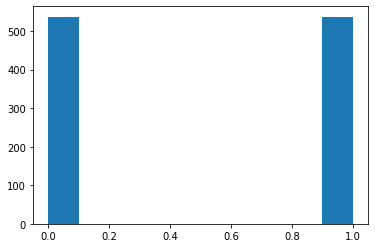

In [47]:
undersamp = under_sampling.RandomUnderSampler()
Xu, Yu = undersamp.fit_resample(X_train, y_train)

h = plt.hist(Yu)

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

cv = StratifiedKFold(n_splits=5)
pipelines = [pipe_nb, pipe_svm, pipe_knn, pipe_lr, pipe_ridge, pipe_dt, pipe_rf, pipe_perc, pipe_mlp, pipe_brf, pipe_ada]
#pipelines = [pipe_nb, pipe_knn]

prec=[]
acc=[]
bacc=[]
fone=[]
revoc=[]
roc=[]
count=0

metrics = ['precision', 'accuracy', 'balanced_accuracy', 'f1', 'recall', 'roc_auc']
for pipe in pipelines:
    
    count+=1
    print('Metrics for model', count)
    score = cross_validate(pipe, Xu, Yu, cv = cv, scoring=metrics, n_jobs=-1)
    acc.append(score['test_accuracy'])
    bacc.append(score['test_balanced_accuracy'])
    prec.append(score['test_precision'])
    fone.append(score['test_f1'])
    revoc.append(score['test_recall'])
    roc.append(score['test_roc_auc'])

Metrics for model 1
Metrics for model 2
Metrics for model 3
Metrics for model 4
Metrics for model 5
Metrics for model 6
Metrics for model 7
Metrics for model 8
Metrics for model 9
Metrics for model 10
Metrics for model 11


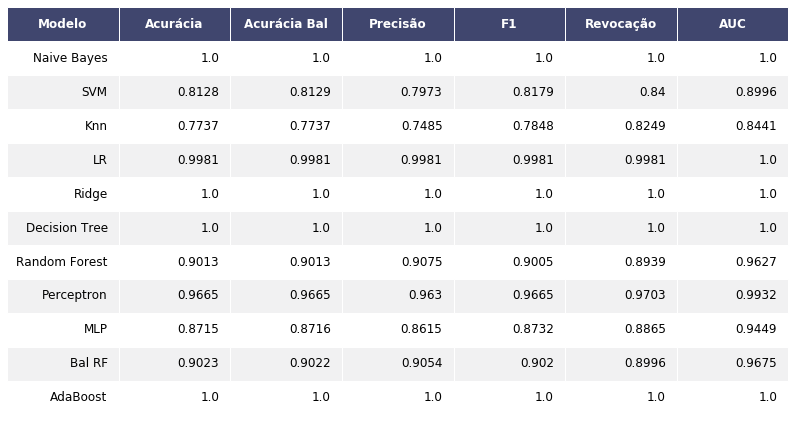

In [49]:
prec=np.array(prec)
acc=np.array(acc)
bacc=np.array(bacc)
fone=np.array(fone)
revoc=np.array(revoc)
roc=np.array(roc)

sc_dic = {'Modelo': ['Naive Bayes', 'SVM', 'Knn', 'LR', 'Ridge','Decision Tree', 'Random Forest', 'Perceptron', 'MLP','Bal RF', 'AdaBoost'],
          'Acurácia': [np.mean(acc[0,:]), np.mean(acc[1,:]), np.mean(acc[2,:]), np.mean(acc[3,:]),
                      np.mean(acc[4,:]), np.mean(acc[5,:]), np.mean(acc[6,:]), np.mean(acc[7,:]), 
                      np.mean(acc[8,:]), np.mean(acc[9,:]), np.mean(acc[10,:])], 
         'Acurácia Bal': [np.mean(bacc[0,:]), np.mean(bacc[1,:]), np.mean(bacc[2,:]), np.mean(bacc[3,:]),
                      np.mean(bacc[4,:]), np.mean(bacc[5,:]), np.mean(bacc[6,:]), np.mean(bacc[7,:]), 
                      np.mean(bacc[8,:]), np.mean(bacc[9,:]),np.mean(bacc[10,:])],
         'Precisão': [np.mean(prec[0,:]), np.mean(prec[1,:]), np.mean(prec[2,:]), np.mean(prec[3,:]),
                      np.mean(prec[4,:]), np.mean(prec[5,:]), np.mean(prec[6,:]), np.mean(prec[7,:]), 
                      np.mean(prec[8,:]), np.mean(prec[9,:]), np.mean(prec[10,:])],
         'F1': [np.mean(fone[0,:]), np.mean(fone[1,:]), np.mean(fone[2,:]), np.mean(fone[3,:]),
                      np.mean(fone[4,:]), np.mean(fone[5,:]), np.mean(fone[6,:]), np.mean(fone[7,:]), 
                      np.mean(fone[8,:]), np.mean(fone[9,:]), np.mean(fone[10,:])],
         'Revocação': [np.mean(revoc[0,:]), np.mean(revoc[1,:]), np.mean(revoc[2,:]), np.mean(revoc[3,:]),
                      np.mean(revoc[4,:]), np.mean(revoc[5,:]), np.mean(revoc[6,:]), np.mean(revoc[7,:]), 
                      np.mean(revoc[8,:]), np.mean(revoc[9,:]), np.mean(revoc[10,:])],
         'AUC': [np.mean(roc[0,:]), np.mean(roc[1,:]), np.mean(roc[2,:]), np.mean(roc[3,:]),
                      np.mean(roc[4,:]), np.mean(roc[5,:]), np.mean(roc[6,:]), np.mean(roc[7,:]), 
                      np.mean(roc[8,:]), np.mean(roc[9,:]), np.mean(roc[10,:])],}


dfd = pd.DataFrame.from_dict(sc_dic)
dfd


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(dfd.round(4), header_columns=0, col_width=2.0)
plt.savefig('Tab3.pdf')

Percebemos uma queda nos scores, possivelmente devido a redução de amostras. Vamos testar um approach hibrido 

### SMOTEEN

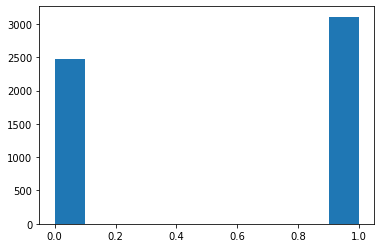

In [50]:
overunder = combine.SMOTEENN()
Xc, Yc = overunder.fit_resample(X_train, y_train)

h = plt.hist(Yc)

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

cv = StratifiedKFold(n_splits=5)
pipelines = [pipe_nb, pipe_svm, pipe_knn, pipe_lr, pipe_ridge, pipe_dt, pipe_rf, pipe_perc, pipe_mlp, pipe_brf, pipe_ada]
#pipelines = [pipe_nb, pipe_knn]

prec=[]
acc=[]
bacc=[]
fone=[]
revoc=[]
roc=[]
count=0

metrics = ['precision', 'accuracy', 'balanced_accuracy', 'f1', 'recall', 'roc_auc']
for pipe in pipelines:
    
    count+=1
    print('Metrics for model', count)
    score = cross_validate(pipe, Xc, Yc, cv = cv, scoring=metrics, n_jobs=-1)
    acc.append(score['test_accuracy'])
    bacc.append(score['test_balanced_accuracy'])
    prec.append(score['test_precision'])
    fone.append(score['test_f1'])
    revoc.append(score['test_recall'])
    roc.append(score['test_roc_auc'])

Metrics for model 1
Metrics for model 2
Metrics for model 3
Metrics for model 4
Metrics for model 5
Metrics for model 6
Metrics for model 7
Metrics for model 8
Metrics for model 9
Metrics for model 10
Metrics for model 11


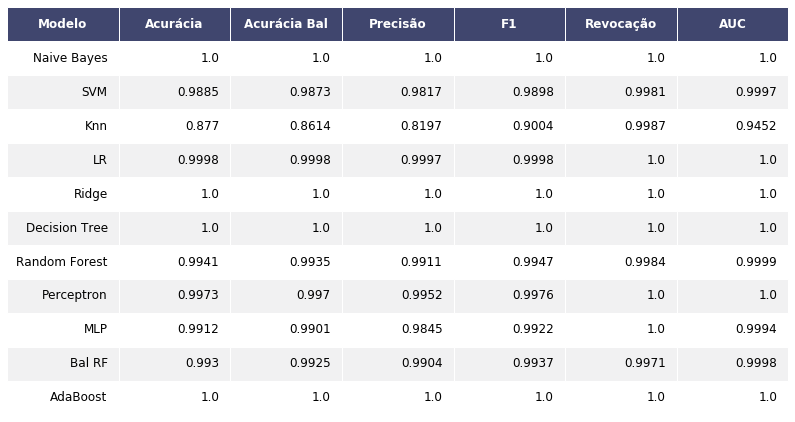

In [52]:
prec=np.array(prec)
acc=np.array(acc)
bacc=np.array(bacc)
fone=np.array(fone)
revoc=np.array(revoc)
roc=np.array(roc)

sc_dic = {'Modelo': ['Naive Bayes', 'SVM', 'Knn', 'LR', 'Ridge','Decision Tree', 'Random Forest', 'Perceptron', 'MLP','Bal RF', 'AdaBoost'],
          'Acurácia': [np.mean(acc[0,:]), np.mean(acc[1,:]), np.mean(acc[2,:]), np.mean(acc[3,:]),
                      np.mean(acc[4,:]), np.mean(acc[5,:]), np.mean(acc[6,:]), np.mean(acc[7,:]), 
                      np.mean(acc[8,:]), np.mean(acc[9,:]), np.mean(acc[10,:])], 
         'Acurácia Bal': [np.mean(bacc[0,:]), np.mean(bacc[1,:]), np.mean(bacc[2,:]), np.mean(bacc[3,:]),
                      np.mean(bacc[4,:]), np.mean(bacc[5,:]), np.mean(bacc[6,:]), np.mean(bacc[7,:]), 
                      np.mean(bacc[8,:]), np.mean(bacc[9,:]),np.mean(bacc[10,:])],
         'Precisão': [np.mean(prec[0,:]), np.mean(prec[1,:]), np.mean(prec[2,:]), np.mean(prec[3,:]),
                      np.mean(prec[4,:]), np.mean(prec[5,:]), np.mean(prec[6,:]), np.mean(prec[7,:]), 
                      np.mean(prec[8,:]), np.mean(prec[9,:]), np.mean(prec[10,:])],
         'F1': [np.mean(fone[0,:]), np.mean(fone[1,:]), np.mean(fone[2,:]), np.mean(fone[3,:]),
                      np.mean(fone[4,:]), np.mean(fone[5,:]), np.mean(fone[6,:]), np.mean(fone[7,:]), 
                      np.mean(fone[8,:]), np.mean(fone[9,:]), np.mean(fone[10,:])],
         'Revocação': [np.mean(revoc[0,:]), np.mean(revoc[1,:]), np.mean(revoc[2,:]), np.mean(revoc[3,:]),
                      np.mean(revoc[4,:]), np.mean(revoc[5,:]), np.mean(revoc[6,:]), np.mean(revoc[7,:]), 
                      np.mean(revoc[8,:]), np.mean(revoc[9,:]), np.mean(revoc[10,:])],
         'AUC': [np.mean(roc[0,:]), np.mean(roc[1,:]), np.mean(roc[2,:]), np.mean(roc[3,:]),
                      np.mean(roc[4,:]), np.mean(roc[5,:]), np.mean(roc[6,:]), np.mean(roc[7,:]), 
                      np.mean(roc[8,:]), np.mean(roc[9,:]), np.mean(roc[10,:])],}


dfd = pd.DataFrame.from_dict(sc_dic)
dfd


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(dfd.round(4), header_columns=0, col_width=2.0)
plt.savefig('Tab4.pdf')

Comparando os métodos no datset de validação

In [53]:
from sklearn.metrics import classification_report


model = pipe_rf.fit(X_train, y_train)

predictions = model.predict(X_test) 
print('Sem resampling')
print(classification_report(y_test, predictions)) 
print(15*'----')


modelOver = pipe_rf.fit(Xo, Yo)
#model.score(X_test,y_test)

predictions_o = modelOver.predict(X_test) 
print('Oversampling')
print(classification_report(y_test, predictions_o)) 
print(15*'----')


modelUnder = pipe_rf.fit(Xu, Yu)
#model.score(X_test,y_test)

predictions_u = modelUnder.predict(X_test) 
print('Undersampling')
print(classification_report(y_test, predictions_u)) 
print(15*'----')



modelOverUnder = pipe_rf.fit(Xc, Yc)
#model.score(X_test,y_test)
print('Over-under sampling')

predictions_c = modelOverUnder.predict(X_test) 
print(classification_report(y_test, predictions_c)) 

Sem resampling
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       787
           1       1.00      0.41      0.58       134

    accuracy                           0.91       921
   macro avg       0.95      0.71      0.77       921
weighted avg       0.92      0.91      0.90       921

------------------------------------------------------------
Oversampling
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       787
           1       0.94      0.77      0.85       134

    accuracy                           0.96       921
   macro avg       0.95      0.88      0.91       921
weighted avg       0.96      0.96      0.96       921

------------------------------------------------------------
Undersampling
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       787
           1       0.57      0.92      0.70       134

    accuracy      

In [54]:
print(roc_auc_score(y_test, predictions))
print(roc_auc_score(y_test, predictions_o))
print(roc_auc_score(y_test, predictions_u))
print(roc_auc_score(y_test, predictions_c))


0.7052238805970149
0.8805164141174685
0.8992347664473059
0.9240218854899581


### Comparando os modelos no dataset de validação

Metrics for test in model 1
Metrics for test in model 2
Metrics for test in model 3
Metrics for test in model 4
Metrics for test in model 5
Metrics for test in model 6
Metrics for test in model 7
Metrics for test in model 8
Metrics for test in model 9
Metrics for test in model 10
Metrics for test in model 11


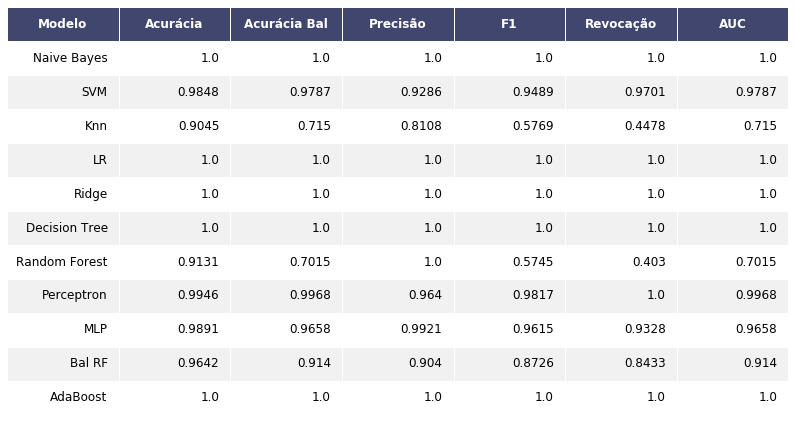

In [55]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, roc_auc_score, precision_score


pipelines = [pipe_nb, pipe_svm, pipe_knn, pipe_lr, pipe_ridge, pipe_dt, pipe_rf, pipe_perc, pipe_mlp, pipe_brf, pipe_ada]

prec=[]
acc=[]
bacc=[]
fone=[]
revoc=[]
roc=[]
count=0

metrics = ['precision', 'accuracy', 'balanced_accuracy', 'f1', 'recall', 'roc_auc']

for pipe in pipelines:
    
    count+=1
    print('Metrics for test in model', count)
    
    model = pipe.fit(X_train, y_train)
    predictions = model.predict(X_test) 
    
    acc.append(accuracy_score(y_test, predictions))
    bacc.append(balanced_accuracy_score(y_test, predictions))
    prec.append(precision_score(y_test, predictions))
    fone.append(f1_score(y_test, predictions))
    revoc.append(recall_score(y_test, predictions))
    roc.append(roc_auc_score(y_test, predictions))
    
###############################################################

prec=np.array(prec)
acc=np.array(acc)
bacc=np.array(bacc)
fone=np.array(fone)
revoc=np.array(revoc)
roc=np.array(roc)


sc_dic = {'Modelo': ['Naive Bayes', 'SVM', 'Knn', 'LR', 'Ridge','Decision Tree', 'Random Forest', 'Perceptron', 'MLP','Bal RF', 'AdaBoost'],
          'Acurácia': [np.mean(acc[0]), np.mean(acc[1]), np.mean(acc[2]), np.mean(acc[3]),
                      np.mean(acc[4]), np.mean(acc[5]), np.mean(acc[6]), np.mean(acc[7]), 
                      np.mean(acc[8]), np.mean(acc[9]), np.mean(acc[10])], 
         'Acurácia Bal': [np.mean(bacc[0]), np.mean(bacc[1]), np.mean(bacc[2]), np.mean(bacc[3]),
                      np.mean(bacc[4]), np.mean(bacc[5]), np.mean(bacc[6]), np.mean(bacc[7]), 
                      np.mean(bacc[8]), np.mean(bacc[9]),np.mean(bacc[10])],
         'Precisão': [np.mean(prec[0]), np.mean(prec[1]), np.mean(prec[2]), np.mean(prec[3]),
                      np.mean(prec[4]), np.mean(prec[5]), np.mean(prec[6]), np.mean(prec[7]), 
                      np.mean(prec[8]), np.mean(prec[9]), np.mean(prec[10])],
         'F1': [np.mean(fone[0]), np.mean(fone[1]), np.mean(fone[2]), np.mean(fone[3]),
                      np.mean(fone[4]), np.mean(fone[5]), np.mean(fone[6]), np.mean(fone[7]), 
                      np.mean(fone[8]), np.mean(fone[9]), np.mean(fone[10])],
         'Revocação': [np.mean(revoc[0]), np.mean(revoc[1]), np.mean(revoc[2]), np.mean(revoc[3]),
                      np.mean(revoc[4]), np.mean(revoc[5]), np.mean(revoc[6]), np.mean(revoc[7]), 
                      np.mean(revoc[8]), np.mean(revoc[9]), np.mean(revoc[10])],
         'AUC': [np.mean(roc[0]), np.mean(roc[1]), np.mean(roc[2]), np.mean(roc[3]),
                      np.mean(roc[4]), np.mean(roc[5]), np.mean(roc[6]), np.mean(roc[7]), 
                      np.mean(roc[8]), np.mean(roc[9]), np.mean(roc[10])],}


dfd = pd.DataFrame.from_dict(sc_dic)
dfd


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(dfd.round(4), header_columns=0, col_width=2.0)
plt.savefig('Tab5.pdf')

Metrics for test in model 1
Metrics for test in model 2
Metrics for test in model 3
Metrics for test in model 4
Metrics for test in model 5
Metrics for test in model 6
Metrics for test in model 7
Metrics for test in model 8
Metrics for test in model 9
Metrics for test in model 10
Metrics for test in model 11


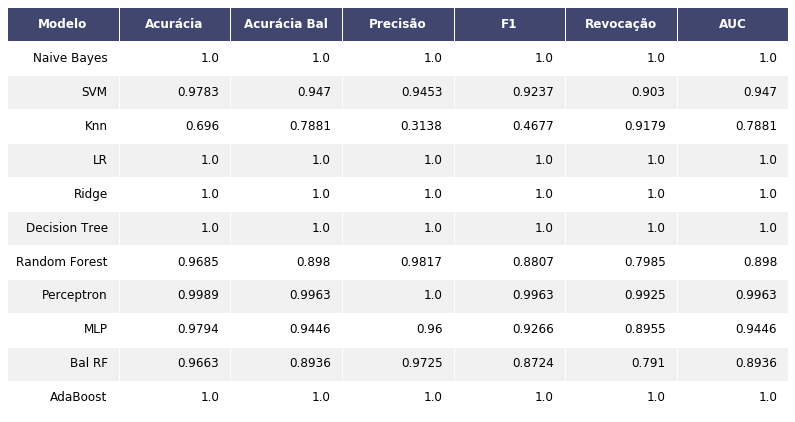

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, roc_auc_score, precision_score


pipelines = [pipe_nb, pipe_svm, pipe_knn, pipe_lr, pipe_ridge, pipe_dt, pipe_rf, pipe_perc, pipe_mlp, pipe_brf, pipe_ada]

prec=[]
acc=[]
bacc=[]
fone=[]
revoc=[]
roc=[]
count=0

metrics = ['precision', 'accuracy', 'balanced_accuracy', 'f1', 'recall', 'roc_auc']

for pipe in pipelines:
    
    count+=1
    print('Metrics for test in model', count)
    
    model = pipe.fit(Xo, Yo)
    predictions = model.predict(X_test) 
    
    acc.append(accuracy_score(y_test, predictions))
    bacc.append(balanced_accuracy_score(y_test, predictions))
    prec.append(precision_score(y_test, predictions))
    fone.append(f1_score(y_test, predictions))
    revoc.append(recall_score(y_test, predictions))
    roc.append(roc_auc_score(y_test, predictions))
    
###############################################################

prec=np.array(prec)
acc=np.array(acc)
bacc=np.array(bacc)
fone=np.array(fone)
revoc=np.array(revoc)
roc=np.array(roc)

sc_dic = {'Modelo': ['Naive Bayes', 'SVM', 'Knn', 'LR', 'Ridge','Decision Tree', 'Random Forest', 'Perceptron', 'MLP','Bal RF', 'AdaBoost'],
          'Acurácia': [np.mean(acc[0]), np.mean(acc[1]), np.mean(acc[2]), np.mean(acc[3]),
                      np.mean(acc[4]), np.mean(acc[5]), np.mean(acc[6]), np.mean(acc[7]), 
                      np.mean(acc[8]), np.mean(acc[9]), np.mean(acc[10])], 
         'Acurácia Bal': [np.mean(bacc[0]), np.mean(bacc[1]), np.mean(bacc[2]), np.mean(bacc[3]),
                      np.mean(bacc[4]), np.mean(bacc[5]), np.mean(bacc[6]), np.mean(bacc[7]), 
                      np.mean(bacc[8]), np.mean(bacc[9]),np.mean(bacc[10])],
         'Precisão': [np.mean(prec[0]), np.mean(prec[1]), np.mean(prec[2]), np.mean(prec[3]),
                      np.mean(prec[4]), np.mean(prec[5]), np.mean(prec[6]), np.mean(prec[7]), 
                      np.mean(prec[8]), np.mean(prec[9]), np.mean(prec[10])],
         'F1': [np.mean(fone[0]), np.mean(fone[1]), np.mean(fone[2]), np.mean(fone[3]),
                      np.mean(fone[4]), np.mean(fone[5]), np.mean(fone[6]), np.mean(fone[7]), 
                      np.mean(fone[8]), np.mean(fone[9]), np.mean(fone[10])],
         'Revocação': [np.mean(revoc[0]), np.mean(revoc[1]), np.mean(revoc[2]), np.mean(revoc[3]),
                      np.mean(revoc[4]), np.mean(revoc[5]), np.mean(revoc[6]), np.mean(revoc[7]), 
                      np.mean(revoc[8]), np.mean(revoc[9]), np.mean(revoc[10])],
         'AUC': [np.mean(roc[0]), np.mean(roc[1]), np.mean(roc[2]), np.mean(roc[3]),
                      np.mean(roc[4]), np.mean(roc[5]), np.mean(roc[6]), np.mean(roc[7]), 
                      np.mean(roc[8]), np.mean(roc[9]), np.mean(roc[10])],}


dfd = pd.DataFrame.from_dict(sc_dic)
dfd


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(dfd.round(4), header_columns=0, col_width=2.0)
plt.savefig('Tab6.pdf')

Metrics for test in model 1
Metrics for test in model 2
Metrics for test in model 3
Metrics for test in model 4
Metrics for test in model 5
Metrics for test in model 6
Metrics for test in model 7
Metrics for test in model 8
Metrics for test in model 9
Metrics for test in model 10
Metrics for test in model 11


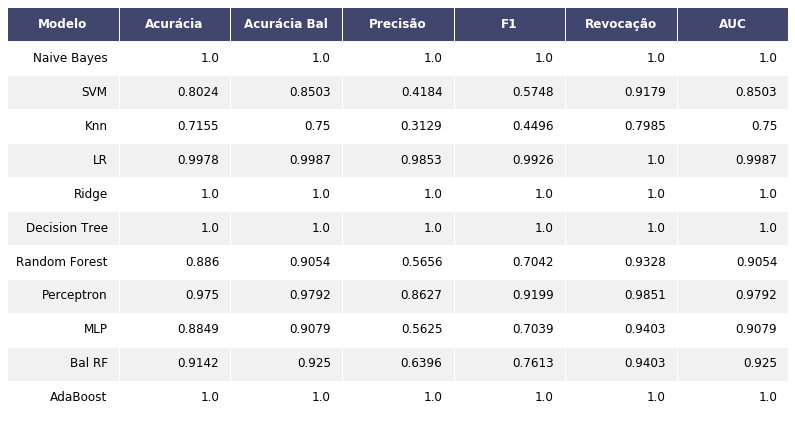

In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, roc_auc_score, precision_score


pipelines = [pipe_nb, pipe_svm, pipe_knn, pipe_lr, pipe_ridge, pipe_dt, pipe_rf, pipe_perc, pipe_mlp, pipe_brf, pipe_ada]

prec=[]
acc=[]
bacc=[]
fone=[]
revoc=[]
roc=[]
count=0

metrics = ['precision', 'accuracy', 'balanced_accuracy', 'f1', 'recall', 'roc_auc']

for pipe in pipelines:
    
    count+=1
    print('Metrics for test in model', count)
    
    model = pipe.fit(Xu, Yu)
    predictions = model.predict(X_test) 
    
    acc.append(accuracy_score(y_test, predictions))
    bacc.append(balanced_accuracy_score(y_test, predictions))
    prec.append(precision_score(y_test, predictions))
    fone.append(f1_score(y_test, predictions))
    revoc.append(recall_score(y_test, predictions))
    roc.append(roc_auc_score(y_test, predictions))
    
###############################################################

prec=np.array(prec)
acc=np.array(acc)
bacc=np.array(bacc)
fone=np.array(fone)
revoc=np.array(revoc)
roc=np.array(roc)

sc_dic = {'Modelo': ['Naive Bayes', 'SVM', 'Knn', 'LR', 'Ridge','Decision Tree', 'Random Forest', 'Perceptron', 'MLP','Bal RF', 'AdaBoost'],
          'Acurácia': [np.mean(acc[0]), np.mean(acc[1]), np.mean(acc[2]), np.mean(acc[3]),
                      np.mean(acc[4]), np.mean(acc[5]), np.mean(acc[6]), np.mean(acc[7]), 
                      np.mean(acc[8]), np.mean(acc[9]), np.mean(acc[10])], 
         'Acurácia Bal': [np.mean(bacc[0]), np.mean(bacc[1]), np.mean(bacc[2]), np.mean(bacc[3]),
                      np.mean(bacc[4]), np.mean(bacc[5]), np.mean(bacc[6]), np.mean(bacc[7]), 
                      np.mean(bacc[8]), np.mean(bacc[9]),np.mean(bacc[10])],
         'Precisão': [np.mean(prec[0]), np.mean(prec[1]), np.mean(prec[2]), np.mean(prec[3]),
                      np.mean(prec[4]), np.mean(prec[5]), np.mean(prec[6]), np.mean(prec[7]), 
                      np.mean(prec[8]), np.mean(prec[9]), np.mean(prec[10])],
         'F1': [np.mean(fone[0]), np.mean(fone[1]), np.mean(fone[2]), np.mean(fone[3]),
                      np.mean(fone[4]), np.mean(fone[5]), np.mean(fone[6]), np.mean(fone[7]), 
                      np.mean(fone[8]), np.mean(fone[9]), np.mean(fone[10])],
         'Revocação': [np.mean(revoc[0]), np.mean(revoc[1]), np.mean(revoc[2]), np.mean(revoc[3]),
                      np.mean(revoc[4]), np.mean(revoc[5]), np.mean(revoc[6]), np.mean(revoc[7]), 
                      np.mean(revoc[8]), np.mean(revoc[9]), np.mean(revoc[10])],
         'AUC': [np.mean(roc[0]), np.mean(roc[1]), np.mean(roc[2]), np.mean(roc[3]),
                      np.mean(roc[4]), np.mean(roc[5]), np.mean(roc[6]), np.mean(roc[7]), 
                      np.mean(roc[8]), np.mean(roc[9]), np.mean(roc[10])],}


dfd = pd.DataFrame.from_dict(sc_dic)
dfd


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(dfd.round(4), header_columns=0, col_width=2.0)
plt.savefig('Tab7.pdf')

Metrics for test in model 1
Metrics for test in model 2
Metrics for test in model 3
Metrics for test in model 4
Metrics for test in model 5
Metrics for test in model 6
Metrics for test in model 7
Metrics for test in model 8
Metrics for test in model 9
Metrics for test in model 10
Metrics for test in model 11


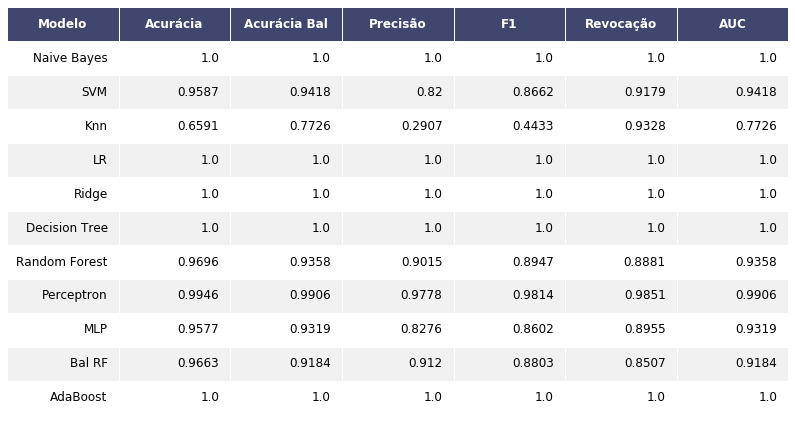

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, roc_auc_score, precision_score


pipelines = [pipe_nb, pipe_svm, pipe_knn, pipe_lr, pipe_ridge, pipe_dt, pipe_rf, pipe_perc, pipe_mlp, pipe_brf, pipe_ada]

prec=[]
acc=[]
bacc=[]
fone=[]
revoc=[]
roc=[]
count=0

metrics = ['precision', 'accuracy', 'balanced_accuracy', 'f1', 'recall', 'roc_auc']

for pipe in pipelines:
    
    count+=1
    print('Metrics for test in model', count)
    
    model = pipe.fit(Xc, Yc)
    predictions = model.predict(X_test) 
    
    acc.append(accuracy_score(y_test, predictions))
    bacc.append(balanced_accuracy_score(y_test, predictions))
    prec.append(precision_score(y_test, predictions))
    fone.append(f1_score(y_test, predictions))
    revoc.append(recall_score(y_test, predictions))
    roc.append(roc_auc_score(y_test, predictions))
    
###############################################################

prec=np.array(prec)
acc=np.array(acc)
bacc=np.array(bacc)
fone=np.array(fone)
revoc=np.array(revoc)
roc=np.array(roc)

sc_dic = {'Modelo': ['Naive Bayes', 'SVM', 'Knn', 'LR', 'Ridge','Decision Tree', 'Random Forest', 'Perceptron', 'MLP','Bal RF', 'AdaBoost'],
          'Acurácia': [np.mean(acc[0]), np.mean(acc[1]), np.mean(acc[2]), np.mean(acc[3]),
                      np.mean(acc[4]), np.mean(acc[5]), np.mean(acc[6]), np.mean(acc[7]), 
                      np.mean(acc[8]), np.mean(acc[9]), np.mean(acc[10])], 
         'Acurácia Bal': [np.mean(bacc[0]), np.mean(bacc[1]), np.mean(bacc[2]), np.mean(bacc[3]),
                      np.mean(bacc[4]), np.mean(bacc[5]), np.mean(bacc[6]), np.mean(bacc[7]), 
                      np.mean(bacc[8]), np.mean(bacc[9]),np.mean(bacc[10])],
         'Precisão': [np.mean(prec[0]), np.mean(prec[1]), np.mean(prec[2]), np.mean(prec[3]),
                      np.mean(prec[4]), np.mean(prec[5]), np.mean(prec[6]), np.mean(prec[7]), 
                      np.mean(prec[8]), np.mean(prec[9]), np.mean(prec[10])],
         'F1': [np.mean(fone[0]), np.mean(fone[1]), np.mean(fone[2]), np.mean(fone[3]),
                      np.mean(fone[4]), np.mean(fone[5]), np.mean(fone[6]), np.mean(fone[7]), 
                      np.mean(fone[8]), np.mean(fone[9]), np.mean(fone[10])],
         'Revocação': [np.mean(revoc[0]), np.mean(revoc[1]), np.mean(revoc[2]), np.mean(revoc[3]),
                      np.mean(revoc[4]), np.mean(revoc[5]), np.mean(revoc[6]), np.mean(revoc[7]), 
                      np.mean(revoc[8]), np.mean(revoc[9]), np.mean(revoc[10])],
         'AUC': [np.mean(roc[0]), np.mean(roc[1]), np.mean(roc[2]), np.mean(roc[3]),
                      np.mean(roc[4]), np.mean(roc[5]), np.mean(roc[6]), np.mean(roc[7]), 
                      np.mean(roc[8]), np.mean(roc[9]), np.mean(roc[10])],}


dfd = pd.DataFrame.from_dict(sc_dic)
dfd


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(dfd.round(4), header_columns=0, col_width=2.0)
plt.savefig('Tab8.pdf')

In [59]:
prec=np.array(prec)
acc=np.array(acc)
bacc=np.array(bacc)
fone=np.array(fone)
revoc=np.array(revoc)
roc=np.array(roc)

sc_dic = {'Model': ['Naive Bayes', 'SVM', 'Knn', 'LR', 'Ridge','Decision Tree', 'Random Forest', 'Perceptron', 'MLP','Bal RF', 'AdaBoost'],
          'Acuracy': [np.mean(acc[0]), np.mean(acc[1]), np.mean(acc[2]), np.mean(acc[3]),
                      np.mean(acc[4]), np.mean(acc[5]), np.mean(acc[6]), np.mean(acc[7]), 
                      np.mean(acc[8]), np.mean(acc[9]), np.mean(acc[10])], 
         'Balanced Acuracy': [np.mean(bacc[0]), np.mean(bacc[1]), np.mean(bacc[2]), np.mean(bacc[3]),
                      np.mean(bacc[4]), np.mean(bacc[5]), np.mean(bacc[6]), np.mean(bacc[7]), 
                      np.mean(bacc[8]), np.mean(bacc[9]),np.mean(bacc[10])],
         'Precision': [np.mean(prec[0]), np.mean(prec[1]), np.mean(prec[2]), np.mean(prec[3]),
                      np.mean(prec[4]), np.mean(prec[5]), np.mean(prec[6]), np.mean(prec[7]), 
                      np.mean(prec[8]), np.mean(prec[9]), np.mean(prec[10])],
         'F1': [np.mean(fone[0]), np.mean(fone[1]), np.mean(fone[2]), np.mean(fone[3]),
                      np.mean(fone[4]), np.mean(fone[5]), np.mean(fone[6]), np.mean(fone[7]), 
                      np.mean(fone[8]), np.mean(fone[9]), np.mean(fone[10])],
         'Recall': [np.mean(revoc[0]), np.mean(revoc[1]), np.mean(revoc[2]), np.mean(revoc[3]),
                      np.mean(revoc[4]), np.mean(revoc[5]), np.mean(revoc[6]), np.mean(revoc[7]), 
                      np.mean(revoc[8]), np.mean(revoc[9]), np.mean(revoc[10])],
         'AUC': [np.mean(roc[0]), np.mean(roc[1]), np.mean(roc[2]), np.mean(roc[3]),
                      np.mean(roc[4]), np.mean(roc[5]), np.mean(roc[6]), np.mean(roc[7]), 
                      np.mean(roc[8]), np.mean(roc[9]), np.mean(roc[10])],}


dfd = pd.DataFrame.from_dict(sc_dic)
dfd

,Model,Acuracy,Balanced Acuracy,Precision,F1,Recall,AUC
0,Naive Bayes,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,SVM,0.958740,0.941801,0.820000,0.866197,0.917910,0.941801
2,Knn,0.659066,0.772644,0.290698,0.443262,0.932836,0.772644
3,LR,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Ridge,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,Random Forest,0.969598,0.935771,0.901515,0.894737,0.888060,0.935771
7,Perceptron,0.994571,0.990631,0.977778,0.981413,0.985075,0.990631
8,MLP,0.957655,0.931878,0.827586,0.860215,0.895522,0.931878
9,Bal RF,0.966341,0.918385,0.912000,0.880309,0.850746,0.918385


# Fine tuning:
- SVM (Balanced accuracy, Recall)
- Logistic regression (Balanced accuracy, Recall)
- MLP (AUC)
- Random Forest (Precision)
- Knn (Precision, AUC)

### Knn

In [60]:
pipe_knn.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'knn', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights'])

In [61]:
from sklearn.model_selection import GridSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True)


k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
metrica = ['euclidean', 'manhattan']

param_grid = {'knn__n_neighbors': k_range, 
              'knn__weights': ['uniform', 'distance'],}
              #'knn__metric_params': ['euclidean', 'manhattan']}


#print (param_grid)
knn = KNeighborsClassifier()

grid = GridSearchCV(pipe_knn, param_grid, cv = cv, scoring = 'balanced_accuracy')
#grid.fit(X_train,y_train)

#print(grid.grid_scores_)
'''
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)
'''

# print (grid.best_score_)
# print (grid.best_params_)
# print (grid.best_estimator_)

'\nprint(grid.grid_scores_[0].parameters)\nprint(grid.grid_scores_[0].cv_validation_scores)\nprint(grid.grid_scores_[0].mean_validation_score)\n'

In [71]:
grid.fit(Xo,Yo)


KeyboardInterrupt: 

In [63]:
'''
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)
'''

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [72]:
# 0.9286545933574623
# {'knn__n_neighbors': 2, 'knn__weights': 'uniform'}
# Pipeline(steps=[('scaler', StandardScaler()),
#                 ('knn', KNeighborsClassifier(n_neighbors=2))])

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, roc_auc_score, precision_score


pipe_knn = Pipeline(steps=[('scaler', StandardScaler()), 
                          ('knn', KNeighborsClassifier(n_neighbors = 2, weights = 'uniform'))])

#scores = cross_val_score(pipe_knn, Xo, Yo, scoring='balanced_accuracy', cv=5)
#print("Accuracy: %0.4f (+ %0.2f) [%s]" % (scores.mean(), scores.std(), label))

model = pipe_knn.fit(Xo, Yo)
predictions = model.predict(X_test) 

prec=[]
acc=[]
bacc=[]
fone=[]
revoc=[]
roc=[]
count=0


    
acc.append(accuracy_score(y_test, predictions))
bacc.append(balanced_accuracy_score(y_test, predictions))
prec.append(precision_score(y_test, predictions))
fone.append(f1_score(y_test, predictions))
revoc.append(recall_score(y_test, predictions))
roc.append(roc_auc_score(y_test, predictions))

### Logistic Regression

In [65]:
# 0.9021383329784969
# {'lr__solver': 'lbfgs', 'lr__penalty': 'l2', 'lr__C': 3237.45754281764}
# Pipeline(steps=[('scaler', StandardScaler()),
#                 ('lr',
#                  LogisticRegression(C=3237.45754281764, class_weight='balanced',
#                                     max_iter=10000))])


#pipe_knn = Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
pipe_lr = Pipeline(steps=[('scaler', StandardScaler()), 
                          ('lr', LogisticRegression(solver = 'lbfgs', penalty = 'l2', 
                                                    C = 3237.45754281764, max_iter=10000, 
                                                     class_weight='balanced'))])
#scores = cross_val_score(pipe_rf, Xo, Yo, scoring='balanced_accuracy', cv=5)
#print("Accuracy: %0.4f (+ %0.2f) [%s]" % (scores.mean(), scores.std(), label))

model = pipe_rf.fit(Xo, Yo)
predictions = model.predict(X_test) 

print(10*'----')
print('Scores for Validation:' )
print(accuracy_score(y_test, predictions))
print(balanced_accuracy_score(y_test, predictions))
print(precision_score(y_test, predictions))
print(f1_score(y_test, predictions))
print(recall_score(y_test, predictions))
print(roc_auc_score(y_test, predictions))

acc.append(accuracy_score(y_test, predictions))
bacc.append(balanced_accuracy_score(y_test, predictions))
prec.append(precision_score(y_test, predictions))
fone.append(f1_score(y_test, predictions))
revoc.append(recall_score(y_test, predictions))
roc.append(roc_auc_score(y_test, predictions))

----------------------------------------
Scores for Validation:
0.9706840390879479
0.9054457698799523
0.9819819819819819
0.8897959183673468
0.8134328358208955
0.9054457698799523


### Random Forest

In [66]:
# 0.9827214622808885
# {'rf__n_estimators': 2000, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 1, 'rf__max_features': 'sqrt', 
# 'rf__max_depth': 30, 'rf__criterion': 'entropy', 'rf__bootstrap': False}
# Pipeline(steps=[('scaler', StandardScaler()),
#                 ('rf',
#                  RandomForestClassifier(bootstrap=False,
#                                         class_weight='balanced',
#                                         criterion='entropy', max_depth=30,
#                                         max_features='sqrt',
#                                         min_samples_split=5,
#                                         n_estimators=2000))])


pipe_rf = Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier(n_estimators = 1000, 
                                                                                      min_samples_split = 5, 
                                                                                      min_samples_leaf = 1,
                                                                                      max_features = 'sqrt',
                                                                                      class_weight='balanced',
                                                                                      max_depth = 30,
                                                                                      criterion = 'entropy',
                                                                                      bootstrap = False))])

# scores = cross_val_score(pipe_rf, Xo, Yo, scoring='balanced_accuracy', cv=5)
# print("Accuracy: %0.4f (+ %0.2f) [%s]" % (scores.mean(), scores.std(), label))

model = pipe_rf.fit(Xo, Yo)
predictions = model.predict(X_test) 

print(10*'----')
print('Scores for Validation:' )
print(accuracy_score(y_test, predictions))
print(balanced_accuracy_score(y_test, predictions))
print(precision_score(y_test, predictions))
print(f1_score(y_test, predictions))
print(recall_score(y_test, predictions))
print(roc_auc_score(y_test, predictions))


acc.append(accuracy_score(y_test, predictions))
bacc.append(balanced_accuracy_score(y_test, predictions))
prec.append(precision_score(y_test, predictions))
fone.append(f1_score(y_test, predictions))
revoc.append(recall_score(y_test, predictions))
roc.append(roc_auc_score(y_test, predictions))

----------------------------------------
Scores for Validation:
0.9652551574375678
0.8929810919987103
0.9636363636363636
0.8688524590163933
0.7910447761194029
0.8929810919987102


### Support Vector Machine

In [67]:
# 0.9827225711447023
# {'svc__kernel': 'rbf', 'svc__gamma': 0.01, 'svc__C': 10}
# Pipeline(steps=[('scaler', StandardScaler()),
#                 ('svc', SVC(C=10, class_weight='balanced', gamma=0.01))])

pipe_svm = Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', gamma= 0.01, C=10, 
                                                                     class_weight='balanced', probability=True))])
#scores = cross_val_score(pipe_svm, Xo, Yo, scoring='balanced_accuracy', cv=5)
#print("Accuracy: %0.4f (+ %0.2f) [%s]" % (scores.mean(), scores.std(), label))

model = pipe_svm.fit(Xo, Yo)
predictions = model.predict(X_test) 

print(10*'----')
print('Scores for Validation:' )
print(accuracy_score(y_test, predictions))
print(balanced_accuracy_score(y_test, predictions))
print(precision_score(y_test, predictions))
print(f1_score(y_test, predictions))
print(recall_score(y_test, predictions))
print(roc_auc_score(y_test, predictions))


acc.append(accuracy_score(y_test, predictions))
bacc.append(balanced_accuracy_score(y_test, predictions))
prec.append(precision_score(y_test, predictions))
fone.append(f1_score(y_test, predictions))
revoc.append(recall_score(y_test, predictions))
roc.append(roc_auc_score(y_test, predictions))

----------------------------------------
Scores for Validation:
0.8555917480998915
0.503731343283582
1.0
0.014814814814814815
0.007462686567164179
0.503731343283582


### MLP

In [68]:


model = pipe_mlp.fit(Xo, Yo)
predictions = model.predict(X_test) 

print(10*'----')
print('Scores for Validation:' )
print(accuracy_score(y_test, predictions))
print(balanced_accuracy_score(y_test, predictions))
print(precision_score(y_test, predictions))
print(f1_score(y_test, predictions))
print(recall_score(y_test, predictions))
print(roc_auc_score(y_test, predictions))


acc.append(accuracy_score(y_test, predictions))
bacc.append(balanced_accuracy_score(y_test, predictions))
prec.append(precision_score(y_test, predictions))
fone.append(f1_score(y_test, predictions))
revoc.append(recall_score(y_test, predictions))
roc.append(roc_auc_score(y_test, predictions))

----------------------------------------
Scores for Validation:
0.9804560260586319
0.9514119365055282
0.953125
0.931297709923664
0.9104477611940298
0.9514119365055282


In [69]:
pipe_svm.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'svc', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

### Voting classifier

In [73]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(
    estimators=[('nb', pipe_nb), ('knn', pipe_knn), ('svm', pipe_svm), ('rf', pipe_rf)],
    voting='hard')

for clf, label in zip([pipe_lr, pipe_knn, pipe_svm, pipe_rf, eclf], ['Logistic Regression', 'Knn', 'SVM', 'Random Forest',
                                                            'Ensemble']):
    
    scores = cross_val_score(clf, Xo, Yo, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+ %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    


Accuracy: 1.00 (+ 0.00) [Logistic Regression]
Accuracy: 0.90 (+ 0.01) [Knn]
Accuracy: 0.96 (+ 0.01) [SVM]
Accuracy: 0.99 (+ 0.00) [Random Forest]
Accuracy: 1.00 (+ 0.00) [Ensemble]


In [74]:
from sklearn.ensemble import VotingClassifier

random_seed = 42
eclf = VotingClassifier(
    estimators=[ ('knn',pipe_knn), ('rf', pipe_rf),  ('mlp', pipe_mlp), ('lr', pipe_lr), 
                ('svm', pipe_svm)],
    voting='soft', weights = [4,3,2,2,0.5],n_jobs=-1)

for clf, label in zip([eclf], ['Ensemble']):
    
    model = clf.fit(Xo, Yo)
    predictions = model.predict(X_test) 
    
    print(10*'----')
    print('Scores for %s:' % label)
    print(accuracy_score(y_test, predictions))
    print(balanced_accuracy_score(y_test, predictions))
    print(precision_score(y_test, predictions))
    print(f1_score(y_test, predictions))
    print(recall_score(y_test, predictions))
    print(roc_auc_score(y_test, predictions))
    
acc.append(accuracy_score(y_test, predictions))
bacc.append(balanced_accuracy_score(y_test, predictions))
prec.append(precision_score(y_test, predictions))
fone.append(f1_score(y_test, predictions))
revoc.append(recall_score(y_test, predictions))
roc.append(roc_auc_score(y_test, predictions))

----------------------------------------
Scores for Ensemble:
0.9869706840390879
0.9676079576703522
0.9692307692307692
0.9545454545454547
0.9402985074626866
0.9676079576703522


In [75]:
prec=np.array(prec)
acc=np.array(acc)
bacc=np.array(bacc)
fone=np.array(fone)
revoc=np.array(revoc)
auc=np.array(roc)

sc_dic = {'Modelo': ['Knn', 'Logistic Regression', 'Random Forest', 'SVM', 'MLP','Ensemble'],
          'Acurácia': [acc[0],acc[1],acc[2], acc[3], acc[4], acc[5]],  
         'Acurácia Bal.': [bacc[0],bacc[1],bacc[2], bacc[3], bacc[4], bacc[5]], 
         'Precisão': [prec[0],prec[1],prec[2], prec[3], prec[4], prec[5]], 
         'F1': [fone[0],fone[1],fone[2], fone[3], fone[4], fone[5]], 
         'Revocação': [revoc[0],revoc[1],revoc[2], revoc[3], revoc[4], revoc[5]], 
         'AUC': [auc[0],auc[1],auc[2], auc[3], auc[4], auc[5],]}


dfd = pd.DataFrame.from_dict(sc_dic)
dfd


render_mpl_table(dfd.round(4), header_columns=0, col_width=2.0)
plt.savefig('Tab9.pdf')

IndexError: index 2 is out of bounds for axis 0 with size 2

In [106]:
bacc

array([0.82340426, 0.80897923, 0.78301672, 0.76054965, 0.79888551,
       0.86680598])

### Aplicando o modelo para a base toda (treino + validação)

<function matplotlib.pyplot.savefig(*args, **kwargs)>

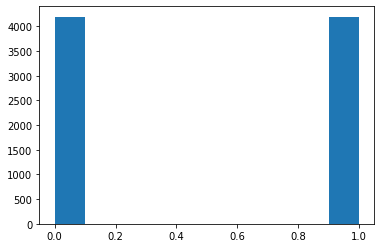

In [107]:
# Fazendo SMOOTE em toda a base de dados

oversamp = over_sampling.SMOTE() # sampling_strategy pode ser usado para casos binários
Xo_all, Yo_all = oversamp.fit_resample(X, y)
h = plt.hist(Yo_all)
plt.savefig

In [108]:
random_seed = 42
eclf = VotingClassifier(
    estimators=[ ('knn',pipe_knn), ('rf', pipe_rf),  ('mlp', pipe_mlp), ('lr', pipe_lr), 
                ('svm', pipe_svm)],
    voting='soft', weights = [4,3,2,2,0.5],n_jobs=-1)

for clf, label in zip([eclf], ['Ensemble']):
    
    model = clf.fit(Xo, Yo)
#     predictions = model.predict(Xo_all) 
    
#     print(10*'----')
#     print('Scores for %s:' % label)
#     print(accuracy_score(Yo_all, predictions))
#     print(balanced_accuracy_score(Yo_all, predictions))
#     print(precision_score(Yo_all, predictions))
#     print(f1_score(Yo_all, predictions))
#     print(recall_score(Yo_all, predictions))
#     print(roc_auc_score(Yo_all, predictions))

In [109]:
df_teste = pd.read_csv('Teste600s.csv', header=None)

df_teste.rename(columns = {0:'Index',1:'File', 2:'Patient', 3: 'Epoch', 4:'Class'}, inplace=True)

df_teste.head()
df_teste.drop(columns=['Index', 'File', 'Patient', 'Epoch', 'Class'], inplace=True)
df_teste.head()

df_teste.to_csv ('Teste600s2.csv', index = False, header=False)


In [110]:
df_teste = pd.read_csv('Teste600s.csv', header=None)
df_teste.rename(columns = {0:'Index',1:'File', 2:'Patient', 3: 'Epoch', 4:'Class'}, inplace=True)
df_teste.drop(columns=['Index', 'File', 'Patient', 'Epoch', 'Class'], inplace=True)
df_teste.head()

,5,6,7,8,9,10,11,12,13,14,...,377,378,379,380,381,382,383,384,385,386
0,0.329070,0.149710,0.064488,0.309410,0.067445,0.011054,0.42132,0.043879,0.018141,0.049463,...,15.248,32.888,19.613,26.2140,17.6240,18.516,21.063,18.606,16.632,13.801
1,0.451940,0.212340,0.051949,0.221140,0.032486,0.007247,0.49555,0.139190,0.039690,0.070337,...,31.863,37.851,33.542,88.5100,46.6130,57.725,59.566,59.699,54.852,30.686
2,0.630300,0.210250,0.045573,0.079280,0.013848,0.005543,0.51091,0.140360,0.029824,0.045653,...,42.393,50.118,46.413,76.3470,83.7190,117.780,75.211,78.782,77.400,52.216
3,0.598010,0.168530,0.037982,0.148250,0.025100,0.009253,0.58236,0.100830,0.023892,0.049420,...,49.034,59.677,44.498,102.3200,64.3780,91.845,109.170,84.859,85.412,45.519
4,0.071243,0.018075,0.009053,0.037706,0.012024,0.006403,0.31090,0.012214,0.008317,0.014378,...,27.841,38.512,8.305,8.6238,9.4103,14.922,16.518,18.629,26.313,21.330


In [111]:
maskZ=(df_teste == 0).astype(int).sum(axis=1)<382*1
df_teste=df_teste[maskZ]

In [112]:
X_final = df_teste
X_final = np.array(X_final)

X_final.shape


(1886, 382)

In [113]:
#model = eclf.fit(Xo, Yo)
model = eclf

model.fit(Xo_all,Yo_all)
predictions = model.predict(X_final) 

In [114]:
# predict class probabilities for all classifiers
probas = [model.predict_proba(X_final)]
probas

[array([[0.23279058, 0.76720942],
        [0.13454995, 0.86545005],
        [0.53233305, 0.46766695],
        ...,
        [0.75822099, 0.24177901],
        [0.7666125 , 0.2333875 ],
        [0.55160812, 0.44839188]])]

In [115]:
probas=np.array(probas)
probas=probas[0,:,:]

In [116]:
dic_df = {'Predicted class': predictions,'Probability preictal': probas[:,1], 'Probability interictal': probas[:,0],}

df_prediction = pd.DataFrame.from_dict(dic_df)

df_prediction.head(50)

,Predicted class,Probability preictal,Probability interictal
0,1,0.767209,0.232791
1,1,0.865450,0.134550
2,0,0.467667,0.532333
3,0,0.215241,0.784759
4,1,0.674507,0.325493
5,1,0.794561,0.205439
6,0,0.047783,0.952217
7,1,0.861778,0.138222
8,0,0.376400,0.623600
9,0,0.249809,0.750191


In [117]:
df_prediction.to_csv ('Predictions600s.csv', index = False)


In [118]:
df42= pd.read_csv('Bisb_solfinal.csv')
df42.dropna(inplace=True)

df42.isnull().sum().sum()

df42

,class,Predicted class
0,0.0,1
2,1.0,0
5,0.0,1
6,1.0,0
8,0.0,1
...,...,...
1897,0.0,0
1901,0.0,0
1904,0.0,0
1906,0.0,0


In [119]:
Y42 = df42['Predicted class']
Ytrue = df42['class']



In [120]:
print(10*'----')
print('Scores for %s:' % label)
print(accuracy_score(Ytrue, Y42))
print(balanced_accuracy_score(Ytrue, Y42))
print(precision_score(Ytrue, Y42))
print(f1_score(Ytrue, Y42))
print(recall_score(Ytrue, Y42))
print(roc_auc_score(Ytrue, Y42))

----------------------------------------
Scores for Ensemble:
0.7791095890410958
0.643954802259887
0.2222222222222222
0.3027027027027027
0.4745762711864407
0.6439548022598871


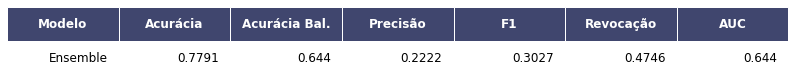

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six

acc=[]
bacc=[]
prec=[]
fone=[]
revoc=[]
auc=[]

acc=accuracy_score(Ytrue, Y42)
bacc=balanced_accuracy_score(Ytrue, Y42)
prec=precision_score(Ytrue, Y42)
fone=f1_score(Ytrue, Y42)
revoc=recall_score(Ytrue, Y42)
auc=roc_auc_score(Ytrue, Y42)


sc_dic = {'Modelo': ['Ensemble'],
          'Acurácia': [acc],  
         'Acurácia Bal.': [bacc], 
         'Precisão': [prec], 
         'F1': [fone], 
         'Revocação': [revoc], 
         'AUC': [auc]}


dfd = pd.DataFrame.from_dict(sc_dic)
dfd


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(dfd.round(4), header_columns=0, col_width=2.0)
plt.savefig('Modelo_ensemble_treino_val_teste.pdf')

## ----------------------------------------------------------------------------